In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

In [9]:
data = pd.read_csv("data.csv")
data.rename(columns={'Salary': 'label'}, inplace=True)
data.rename(columns={'YearsExperience' : '1'}, inplace=True)
data.head(5)

,1,label
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


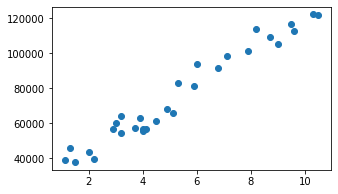

In [10]:
#visualize raw data
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])

In [42]:
class Regression:
    def __init__(self, training_data, n_features, n_iter=100, tolerance=1):
        """
            training_data: DataFrame; raw dataset with two independent variables;
            weights: array; output; coefficients
            x: array; first independent variable;
            y: array; second independent variable;
            label: correct provided label;
        """
        self.training_data = training_data
        # self.weights = np.zeros((n_features+1,1))
        self.weights = np.zeros(n_features)
        self.weights_0 = 0
        self.n_iter = n_iter
        self.tolerance = tolerance

        self.label = training_data['label'].to_numpy()
    
    def prepare_x(self, index):
        x = []
        for column_name in self.training_data.columns:
            if column_name != "label":
                x.append(self.training_data[column_name].to_numpy()[index])
        return x
    
    def calculate_gradient(self, lamb = 0):
        length = len(self.label)
        index = random.randint(0, length-1)
        x = self.prepare_x(index)
        gradient = 2/length * np.multiply(((np.dot(np.transpose(self.weights), x)) - self.label[index]), x) + 2 * lamb * self.weights
        return gradient
    
    def bgd(self):
        learn_rate = 1
        for t in range(self.n_iter):
            gradient = self.calculate_gradient()
            self.weights -= learn_rate * gradient
            if t != 0:
                learn_rate = 1/t
            print(gradient)
            if np.linalg.norm(gradient) <= self.tolerance:
                break
        return self.weights
        


In [46]:
regression = Regression(training_data=data, n_features=1, n_iter=100, tolerance=10)
weights = regression.bgd()

[-22193.08]
[8794.21866667]
[-1527.31407644]
[-483.99724268]
[-952.82609773]
[-2738.53036178]
[-1580.73983079]
[1991.75188871]
[13861.53836735]
[-1741.75295365]
[2778.16590381]
[-1660.58716637]
[-3480.3134355]
[7251.34202324]
[-2080.24233705]
[-3684.1362943]
[16293.58061461]
[-2536.47444502]
[-5279.071804]
[-1707.96194242]
[16578.78261454]
[-2861.14149702]
[-2524.78612428]
[-1051.79594175]
[-2505.85397622]
[-884.58625714]
[11062.9717377]
[-4870.67185484]
[-2285.5672512]
[-3507.22268741]
[-2466.15456422]
[-3389.31574012]
[-1254.98435448]
[1201.9550896]
[-1461.61612929]
[-349.16284414]
[-2161.45824881]
[8461.00489353]
[-1797.46339201]
[11667.90788211]
[-771.4245467]
[12040.86158981]
[-3015.25580521]
[-2225.89871546]
[-6206.5876545]
[11819.31877926]
[-0.96393298]


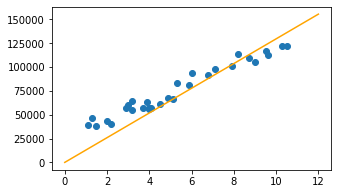

In [49]:
#visualize raw data
plt.figure(figsize=(5,3))
plt.scatter(data['1'], data["label"])
line_indpt = np.linspace(0, 12, 100)
line = weights * line_indpt
plt.plot(line_indpt, line, color="orange")